In [1]:
import keras
import tensorflow as tf
import pandas as pd

Using TensorFlow backend.


In [5]:
from keras.layers import Input, Dense
from keras.datasets import mnist
from keras.models import Model
import numpy as np
from keras.optimizers import SGD
# building using the Functional API

In [45]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:

autoencoder.compile(optimizer='adadelta', loss='mse')

# prepare our input data. We're using MNIST digits, and we're discarding the labels 
# since we're only interested in encoding/decoding the input images


(x_train, _), (x_test, _) = mnist.load_data()

# normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape x_train and x_test
x_train = np.reshape(x_train,[-1, 28*28])
x_test = np.reshape(x_test,[-1, 28*28])

# train our autoencoder for 50 epochs

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.1227 - val_loss: 0.0721
Epoch 2/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.0706 - val_loss: 0.0695
Epoch 3/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.0687 - val_loss: 0.0676
Epoch 4/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0665 - val_loss: 0.0650
Epoch 5/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0636 - val_loss: 0.0617
Epoch 6/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.0602 - val_loss: 0.0582
Epoch 7/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.0569 - val_loss: 0.0550
Epoch 8/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.0539 - val_loss: 0.0521
Epoch 9/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.0512 - val_loss: 0.0496
Epoch

In [46]:
from PIL import Image
# Solution:

# We should create a separate encoder model

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# As well as the decoder model

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)

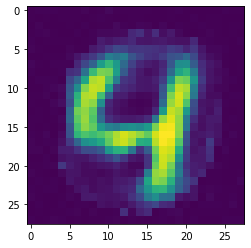

In [47]:
import matplotlib.pyplot as plt

# plot the encode images
for i, img in enumerate(encoded_imgs[:5]):
    encoded_img = img.reshape(8,4)
    e_image = Image.fromarray(encoded_img, "L")
    plt.imshow(encoded_img)
    e_image.save(f"number_{i}.png")
    # image.show()
    # plot the decoded images
    # reshaped_img = img.reshape()
    # decoded_img = decoder.predict(x_test[i]).reshape((28, 28))
    # recon_image = decoded_img.reshape(28, 28)
    # decoded_img = decoder.predict(np.array([img])).reshape((28, 28))
    decoded_img = decoded_imgs[i].reshape((28, 28))
    # image = decoded_imgs[i]
    # recon_image = image.reshape(28, 28)
    d_image = Image.fromarray(decoded_img, "L")
    plt.imshow(decoded_img)
    d_image.save(f"decoded_number{i}.png")
    # image.show()

In [16]:
# plot the decoded images
for img in decoded_imgs[0:5]:
    img = img.reshape(28, 28)
    image = Image.fromarray(img, "L")
    image.save("number.png")
    image.show()